# Introduction

This notebook is designed to be the "exercise" notebook for you to practice defining hierarchical models. We will do this with the finches dataset again.

In [1]:
import pandas as pd
import pymc3 as pm
from data import load_finches_2012
from utils import despine_traceplot

%load_ext autoreload
%autoreload 2
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

In [2]:
df = load_finches_2012()
df.groupby('species').size()

species
fortis      121
scandens    127
unknown       1
dtype: int64

In [3]:
df.sample(5)

,band,species,beak_length,beak_depth,species_enc
226,21260,scandens,13.90,9.30,1
74,19942,fortis,11.50,8.10,0
206,21057,scandens,12.90,8.10,1
45,19623,fortis,9.10,7.60,0
131,19214,scandens,12.95,8.85,1


In [4]:
df.groupby('species')['beak_depth'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
fortis,121.0,8.605372,0.732570,7.2,8.1,8.5,9.0,11.1
scandens,127.0,9.186220,0.669241,7.7,8.8,9.2,9.6,11.0
unknown,1.0,6.800000,NaN,6.8,6.8,6.8,6.8,6.8


In [5]:
fortis_filter = df['species'] == 'fortis'
scandens_filter = df['species'] == 'scandens'
unknown_filter = df['species'] == 'unknown'

**Exercise:** Define a hierarchical model for the finches beak depths. For bonus points, use NumPy-like fancy indexing!

If you'd like a hint, one possible model you can implement is shown below.

![](../images/darwins-finches-hierarchical-model.jpg)

In [7]:
with pm.Model() as beak_depth_model:
    # SD can only be positive, therefore it is reasonable to constrain to >0
    # Likewise for betas.
    sd_hyper = pm.HalfCauchy('sd_hyper', beta=100)
    beta_hyper = pm.HalfCauchy('beta_hyper', beta=100)
    
    # Beaks cannot be of "negative" mean, therefore, HalfNormal is 
    # a reasonable, constrained prior.
    mean = pm.HalfNormal('mean', sd=sd_hyper, shape=(3,))
    sd = pm.HalfCauchy('sd', beta=beta_hyper, shape=(3,))
    nu = pm.Exponential('nu', lam=1/29.) + 1
    
    # Define the likelihood distribution for the data.
    like = pm.StudentT('likelihood', 
                       nu=nu,
                       mu=mean[df['species_enc']], 
                       sd=sd[df['species_enc']], 
                       observed=df['beak_depth'])

Sample from the posterior distribution!

In [8]:
with beak_depth_model:
    trace = pm.sample(2000, nuts_kwargs={'target_accept': 0.95})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [nu_log__, sd_log__, mean_log__, beta_hyper_log__, sd_hyper_log__]
100%|██████████████████████████████████████████████████████████████████████████████| 2500/2500 [01:47<00:00, 23.31it/s]


Visualize the traceplots to check for convergence.

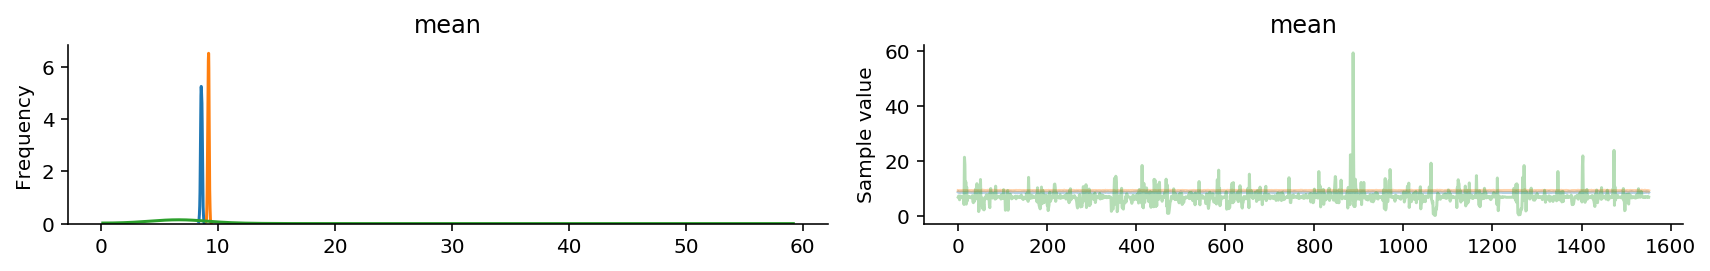

In [8]:
traces = pm.traceplot(trace, varnames=['mean'])
despine_traceplot(traces)

Visualize the posterior distributions using the `plot_posterior` or `forestplot` functions.

Text(0.5,1,'unknown')

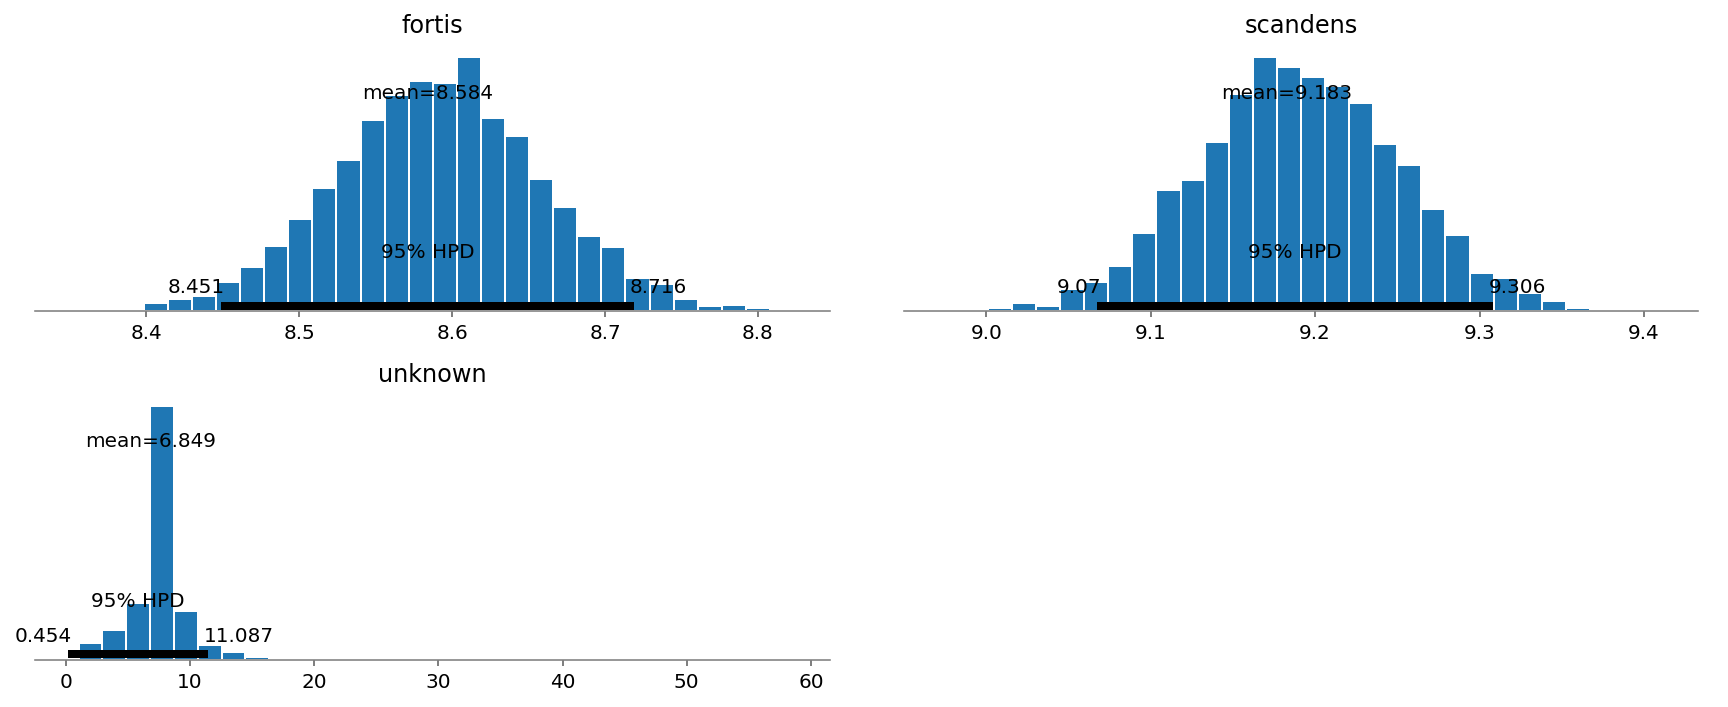

In [9]:
ax1, ax2, ax3 = pm.plot_posterior(trace, varnames=['mean'])
ax1.set_title('fortis')
ax2.set_title('scandens')
ax3.set_title('unknown')

Now, repeat the model specification for beak length.

In [10]:
with pm.Model() as beak_length_model:
    # SD can only be positive, therefore it is reasonable to constrain to >0
    # Likewise for betas.
    sd_hyper = pm.HalfCauchy('sd_hyper', beta=100)
    beta_hyper = pm.HalfCauchy('beta_hyper', beta=100)
    
    # Beaks cannot be of "negative" mean, therefore, HalfNormal is 
    # a reasonable, constrained prior.
    mean = pm.HalfNormal('mean', sd=sd_hyper, shape=(3,))
    sd = pm.HalfCauchy('sd', beta=beta_hyper, shape=(3,))
    nu = pm.Exponential('nu', lam=1/29.) + 1
    
    # Define the likelihood distribution for the data.
    like = pm.StudentT('likelihood', 
                       nu=nu,
                       mu=mean[df['species_enc']], 
                       sd=sd[df['species_enc']], 
                       observed=df['beak_length'])

In [ ]:
with beak_length_model:
    trace = pm.sample(2000, nuts_kwargs={'target_accept': 0.95})

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [nu_log__, sd_log__, mean_log__, beta_hyper_log__, sd_hyper_log__]
 11%|████████▊                                                                      | 280/2500 [00:32<04:15,  8.69it/s]

In [ ]:
traces = pm.traceplot(trace)
despine_traceplot(traces)

In [ ]:
ax1, ax2, ax3 = pm.plot_posterior(trace, varnames=['mean'])
ax1.set_title('fortis')
ax2.set_title('scandens')
ax3.set_title('unknown')

**Discuss:** 

- Are the estimates for the unknown species' beak depth and beak length more reasonable? How so?